# Investigating Fandango Movie Ratings

Previously, Fandango movie ratings were shown to be biased in favor of higher ratings. Since this news was spread, Fandango promised to correct the issue. You can read the original data journalism article written by Alex Olteanu [here](https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19).

The purpose of this project is to analyze current ratings on Fandango's website to try and determine if the issue has, indeed, been corrected. We'll compare ratings for popular movies from 2015 to popular movies in 2016. While this is not a perfect proxy for all rated movies, it will give color to the question as a whole.

In [25]:
import pandas as pd
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

## Briefly Explore Data

In [26]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [27]:
fandango_score_comparison.shape

(146, 22)

In [28]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [29]:
movie_ratings_16_17.shape

(214, 15)

In [30]:
# Select columns needed for analysis
fandango_15 = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_16 = movie_ratings_16_17[movie_ratings_16_17['year'] == 2016][['movie', 'year', 'fandango']]


fandango_16 contains only movies with significant numbers of reviews (> 30). fandango_15 may contain less reviewed movies. We'll check the number of votes for the 2015 dataset and only include those with >30 ratings.

In [31]:
fandango_15['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

As the minimum number of votes for any movie in the 2015 data is 35, we'll include all movies from fandango_15.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange

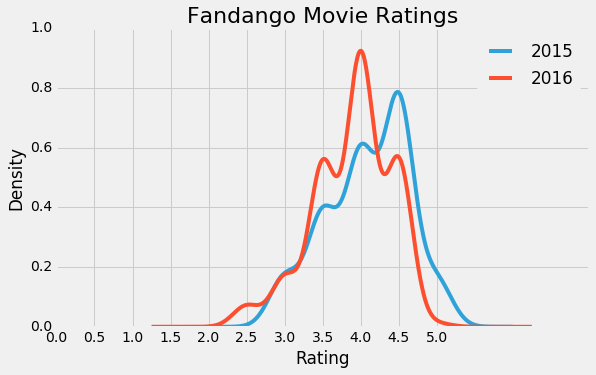

In [58]:
plt.style.use('fivethirtyeight')
fandango_15['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8.5, 5))
fandango_16['fandango'].plot.kde(label='2016', legend=True)
plt.xticks(arange(0,5.5,0.5))
plt.title('Fandango Movie Ratings', size=22)
plt.xlabel('Rating')

Both distributions are strongly right skewed, with neither showing any movies rated at 2 or below. The 2015 graph is clearly centered higher than 2016's, with a peak at the 4.5 value and a significant number of 5 star ratings.

The 2016 dataset has both a minimum and maximum lower than the 2015 data.

This histogram of the two datasets show that, in fact, the 2016 distribution only contains clear ratings (2.5, 3.0, 3.5, etc.) which explains the shape of the density previously.

We'll now explore the frequency distributions of each dataset.

In [49]:
fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [50]:
fandango_16['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [55]:
fandango_15['Fandango_Stars'].describe()[1:4]

mean    4.089041
std     0.540386
min     3.000000
Name: Fandango_Stars, dtype: float64

In [54]:
fandango_16['fandango'].describe()[1:4]

mean    3.887435
std     0.509540
min     2.500000
Name: fandango, dtype: float64

The descriptive statistics show that ratings have indeed shifted lower from 2015 to 2016.
-  Mean: 4.09 to 3.89
-  Minimum: 3 to 2.5
-  Percent with 5-star rating: 7.5% to 0.5%
-  Percent with 4.5-star rating: 37.67% to 24.61%

In [68]:
ratings_15 = fandango_15['Fandango_Stars']
ratings_16 = fandango_16['fandango']
mean_15, mean_16 = ratings_15.mean(), ratings_16.mean()
median_15, median_16 = ratings_15.median(), ratings_16.median()
mode_15, mode_16 = ratings_15.mode()[0], ratings_16.mode()[0]

In [69]:
summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


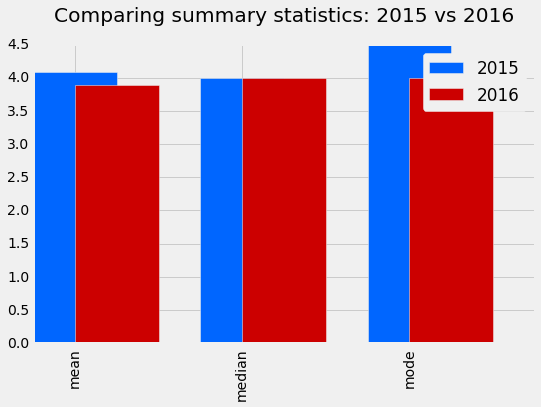

In [85]:
summary['2015'].plot.bar(legend='2015', align='center', color = '#0066FF', figsize=(8,5))
summary['2016'].plot.bar(legend='2016', align='edge', color = '#CC0000')
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.06)
plt.legend(loc=0)


The mean score in 2016 was down by 0.2 stars from 2015. 